In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simpson
from utils import make_nice_plots
make_nice_plots()


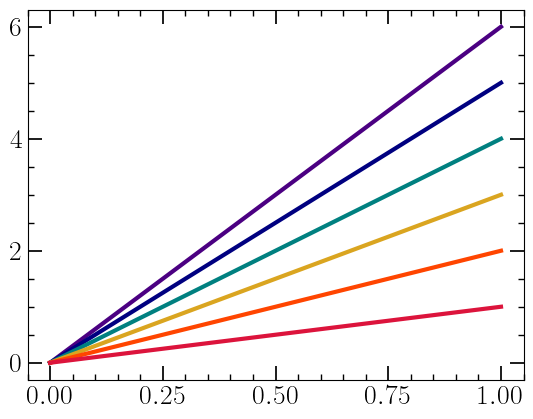

In [2]:
xx = np.linspace(0, 1, 100)
plt.figure()
plt.plot(xx, 6 * xx, color='indigo', linewidth=3)
plt.plot(xx, 5 * xx, color='navy', linewidth=3)
plt.plot(xx, 4 * xx, color='teal', linewidth=3)
plt.plot(xx, 3 * xx, color='goldenrod', linewidth=3)
plt.plot(xx, 2 * xx, color='orangered', linewidth=3)
plt.plot(xx, 1 * xx, color='crimson', linewidth=3)
plt.show()

COLORS = ['orangered', 'navy', 'teal', 'goldenrod', 'indigo', 'crimson']


In [3]:
def remove_infs(data):
    inf_idx = []
    for i in range(data.shape[0]):
        log_llh = data[i,:,:]
        if np.sum(np.isinf(log_llh)) != 0:
            inf_idx.append(i)
    
    remove_idx = [x for x in range(data.shape[0]) if x not in inf_idx]
    return data[remove_idx,:,:]


def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]


def combine_posteriors(filename, start=0, every=1):
    alldata = remove_infs( np.load(filename) )
    sliced_data = alldata[start::every,...]
    post = np.sum(sliced_data, axis=0)
    return post, post.shape


def get_cdfs(posteriors):
    posteriors -= np.max(posteriors, axis=0)
    pdf = np.exp(posteriors)
    cdfs = np.cumsum(pdf, axis=0)
    cdfs /= np.max(cdfs, axis=0)
    return cdfs


def get_pdfs(posteriors, axis):
    posteriors -= np.max(posteriors, axis=0)
    pdf = np.exp(posteriors)
    norms = simpson(y=pdf, x=axis, axis=0)  # Simpson should be fine...
    pdfs = pdf / norms
    return pdfs


In [60]:
# Plot with AGN errors (change ASSUMENOERR between False and True)
# combined_posteriors_AGNZERROR_005, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.05_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100.npy')
# combined_posteriors_AGNZERROR_020, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.2_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100.npy')
# posteriors = [combined_posteriors_AGNZERROR_005, combined_posteriors_AGNZERROR_020]
# LABELS = [0.05, 0.2]

# Plot without AGN errors
# combined_posteriors_AGNZERROR_000, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100.npy')
# posteriors = [combined_posteriors_AGNZERROR_000]
# LABELS = [0]

# Plot using only masses
# combined_posteriors_MASSERROR_10, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_BATCH_100_PRIMARY_MASS_ERROR_10.npy')
# combined_posteriors_MASSERROR_40, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_BATCH_100_PRIMARY_MASS_ERROR_40.npy')
# posteriors = [combined_posteriors_MASSERROR_10, combined_posteriors_MASSERROR_40]
# LABELS = [10, 40]

# Plot using both mass and redshift
# combined_posteriors_AGNZERROR_005_MASSERROR_10, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.05_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100_PRIMARY_MASS_ERROR_10_AGNMODEL_G_ALTMODEL_G.npy')
# combined_posteriors_AGNZERROR_005_MASSERROR_40, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.05_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100_PRIMARY_MASS_ERROR_40_AGNMODEL_G_ALTMODEL_G.npy')
# posteriors = [combined_posteriors_AGNZERROR_005_MASSERROR_10, combined_posteriors_AGNZERROR_005_MASSERROR_40]
# LABELS_MASS = [10, 40]
# LABELS_REDSHIFT = [0.05, 0.05]

# Just for printing the CIs, ignore the names
# combined_posteriors_AGNZERROR_005, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.05_ZMAX_1.5_NAGN_100.npy')
# combined_posteriors_AGNZERROR_020, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.3_ZMAX_1.5_NAGN_100.npy')
# posteriors = [combined_posteriors_AGNZERROR_005, combined_posteriors_AGNZERROR_020]
# LABELS = [0.05, 0.2]

# Using only skypos
# combined_posteriors_SKYPOS, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/posteriors_SKYMAP_CL_0.9_AGNZERROR_0.2_NAGN_10000_BATCH_100.npy')
# posteriors = [combined_posteriors_SKYPOS]
# LABELS = [0]

# combined_posteriors_AGNZERROR_000, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/posteriors_SKYMAP_CL_0.9_AGNZERROR_0_NAGN_100_BATCH_10.npy')
# combined_posteriors_AGNZERROR_0001, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/posteriors_SKYMAP_CL_0.9_AGNZERROR_0.001_NAGN_100_BATCH_10.npy')
# combined_posteriors_AGNZERROR_005, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/posteriors_SKYMAP_CL_0.9_AGNZERROR_0.05_NAGN_100_BATCH_10.npy')
# combined_posteriors_AGNZERROR_020, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/posteriors_SKYMAP_CL_0.9_AGNZERROR_0.2_NAGN_100_BATCH_10.npy')
# posteriors = [combined_posteriors_AGNZERROR_000, combined_posteriors_AGNZERROR_0001, combined_posteriors_AGNZERROR_005, combined_posteriors_AGNZERROR_020]
# LABELS = [0, 0.001, 0.05, 0.2]

combined_posteriors_AGNZERROR_000, posteriors_shape = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/new_ligoskymap_posteriors.npy')
posteriors = [combined_posteriors_AGNZERROR_000]
LABELS = [0]


In [61]:
####################################################################
BATCH = int(40)
MAX_N_FAGNS = posteriors_shape[1]
CALC_LOGLLH_AT_N_POINTS = posteriors_shape[0] # Only change if you want higher resolution
N_TRUE_FAGNS = min(BATCH + 1, MAX_N_FAGNS)  # Cannot create more f_agn values than BATCH+1 and don't want to generate more than MAX_N_FAGNS
LOG_LLH_X_AX = np.linspace(0.0001, 0.9999, CALC_LOGLLH_AT_N_POINTS)
USE_N_AGN_EVENTS = np.arange(0, BATCH + 1, int(BATCH / (N_TRUE_FAGNS - 1)), dtype=np.int32)
TRUE_FAGNS = USE_N_AGN_EVENTS / BATCH
####################################################################

In [62]:
print(TRUE_FAGNS, TRUE_FAGNS * 40)
realized_fagns = [0, 8/38, 15/36, 22/37, 30/36, 38/38]
print(realized_fagns)

[0.  0.2 0.4 0.6 0.8 1. ] [ 0.  8. 16. 24. 32. 40.]
[0, 0.21052631578947367, 0.4166666666666667, 0.5945945945945946, 0.8333333333333334, 1.0]


Median - True: [ 0.14684804 -0.10302785 -0.00112475 -0.10079286  0.06801132 -0.17958813]
90% CI: [0.36375004 0.28978042 0.44942675 0.49768027 0.2795864  0.41051551], so +/- 0.19089494982340424


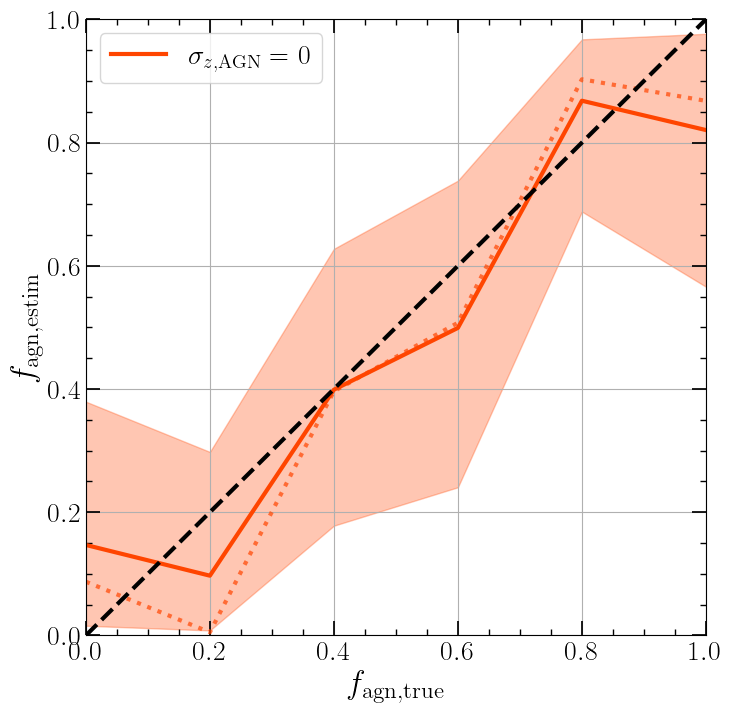

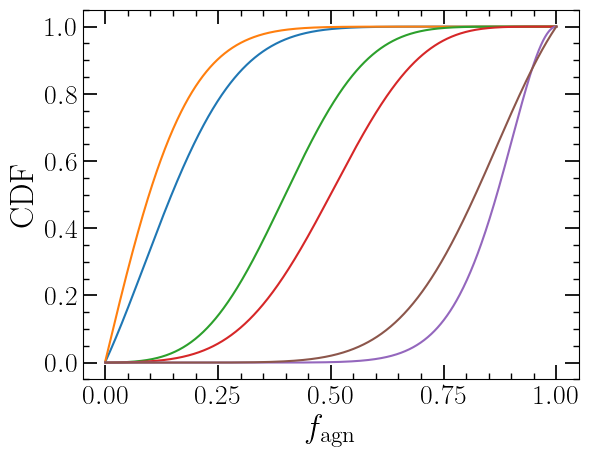

In [63]:
fig1, ax1 = plt.subplots(figsize=(8,8))
for idx, posterior in enumerate(posteriors):

    cdfs = get_cdfs(posterior)

    q005 = np.zeros_like(TRUE_FAGNS)
    q050 = np.zeros_like(TRUE_FAGNS)
    q095 = np.zeros_like(TRUE_FAGNS)
    fig2, ax2 = plt.subplots()
    ax2.plot(LOG_LLH_X_AX, cdfs)
    ax2.set_ylabel('CDF')
    ax2.set_xlabel(r'$f_{\rm agn}$')
    for i, cdf in enumerate(cdfs.T):
        inverse_cdf = interp1d(cdf, LOG_LLH_X_AX, bounds_error=False, fill_value='extrapolate')
        q005[i] = inverse_cdf(0.05)
        q050[i] = inverse_cdf(0.50)
        q095[i] = inverse_cdf(0.95)
    fig2.show()

    print(f'Median - True: {q050 - TRUE_FAGNS}')
    print(f'90% CI: {q095 - q005}, so +/- {np.mean(q095 - q005)/2}')

    mode_fagns = LOG_LLH_X_AX[np.argmax(posterior, axis=0)]

    ax1.plot(TRUE_FAGNS, mode_fagns, color=COLORS[idx], alpha=0.7, linewidth=3, linestyle='dotted')
    # ax1.plot(TRUE_FAGNS, q050, color=COLORS[idx], linewidth=3)
    # ax1.plot(TRUE_FAGNS, q050, color=COLORS[idx], linewidth=3, label=r'$\sigma_{m} =$ ' + str(LABELS[idx]) + r'$M_{\odot}$')
    ax1.plot(TRUE_FAGNS, q050, color=COLORS[idx], linewidth=3, label=r'$\sigma_{z, \rm AGN} =$ ' + str(LABELS[idx]))
    # ax1.plot(TRUE_FAGNS, q050, color=COLORS[idx], linewidth=3, label=r'$\sigma_{z, \rm AGN} =$ ' + str(LABELS_REDSHIFT[idx]) + r' $\sigma_{m} =$ ' + str(LABELS_MASS[idx]) + r'$M_{\odot}$')
    ax1.fill_between(TRUE_FAGNS, q005, q095, color=COLORS[idx], alpha=0.3)  # , label=r'$90\%$ CI'

ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='dashed', color='black', zorder=6, linewidth=3)
ax1.set_xlabel(r'$f_{\rm agn, true}$')
ax1.set_ylabel(r'$f_{\rm agn, estim}$')
ax1.grid()
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.legend()
# fig1.savefig('consistent_llh.pdf', bbox_inches='tight')
fig1.show()

# relative_estimates = estimated_fagns - TRUE_FAGNS
# # old_relative_estimates = old_estimates - TRUE_FAGNS
# plt.figure(figsize=(8,8))
# plt.plot(TRUE_FAGNS, relative_estimates, color='red', linewidth=3, label='New')
# # plt.plot(TRUE_FAGNS, old_relative_estimates, color='blue', linewidth=3, label='Old')
# # plt.plot(TRUE_FAGNS, np.mean(relative_estimates, axis=0), color='blue', linewidth=3, label='Mean')
# plt.plot(np.linspace(0,1,100), np.zeros(100), linestyle='dashed', color='black', zorder=6, linewidth=3)
# # plt.fill_between(TRUE_FAGNS, q016, q084, color='red', alpha=0.3, label=r'$68\%$ CI')
# plt.xlabel(r'$f_{\rm agn, true}$')
# plt.ylabel(r'$f_{\rm agn, estim} - f_{\rm agn, true}$')
# plt.grid()
# plt.legend()
# plt.xlim(0, 1)
# # plt.savefig('abserr_diff.pdf')
# plt.show()


In [65]:
# -0.02103 / (0.03878035/2)

-0.13530383 / (0.07890333/2)

-3.4296101317903824

In [39]:
combined_posteriors_GWZERROR_005, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.05_ZMAX_1.5_NAGN_100.npy')
combined_posteriors_GWZERROR_010, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.1_ZMAX_1.5_NAGN_100.npy')
combined_posteriors_GWZERROR_020, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100.npy')
combined_posteriors_GWZERROR_030, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0_ASSUMENOERR_True_BATCH_100_GWDISTERR_0.3_ZMAX_1.5_NAGN_100.npy')

# combined_posteriors_GWZERROR_005, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.2_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.05_ZMAX_1.5_NAGN_100.npy')
# combined_posteriors_GWZERROR_010, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.2_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.1_ZMAX_1.5_NAGN_100.npy')
# combined_posteriors_GWZERROR_020, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.2_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.2_ZMAX_1.5_NAGN_100.npy')
# combined_posteriors_GWZERROR_030, _ = combine_posteriors('/net/vdesk/data2/pouw/MRP/mockdata_analysis/darksirenpop/actually_used_posteriors/posteriors_AGNZERROR_0.2_ASSUMENOERR_False_BATCH_100_GWDISTERR_0.3_ZMAX_1.5_NAGN_100.npy')

posteriors = [combined_posteriors_GWZERROR_005, combined_posteriors_GWZERROR_010, combined_posteriors_GWZERROR_020, combined_posteriors_GWZERROR_030]
ALPHAS = [0.3, 0.5, 0.75, 1]


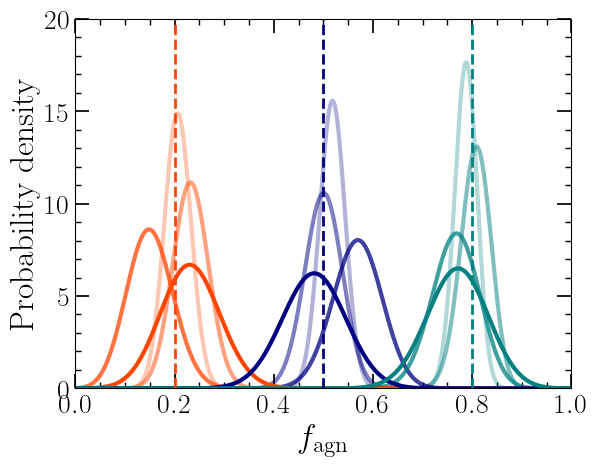

In [40]:
from matplotlib.lines import Line2D

dashed_line = Line2D([0], [0], color='black', linestyle='--', label=r'$f_{\rm agn, true}$')
solid_alpha_5p = Line2D([0], [0], color='black', alpha=ALPHAS[0], label=r'$(\sigma_{d_{L}} / d_{L})_{\rm GW} = 5\%$')
solid_alpha_10p = Line2D([0], [0], color='black', alpha=ALPHAS[1], label=r'$(\sigma_{d_{L}} / d_{L})_{\rm GW} = 10\%$')
solid_alpha_20p = Line2D([0], [0], color='black', alpha=ALPHAS[2], label=r'$(\sigma_{d_{L}} / d_{L})_{\rm GW} = 20\%$')
solid_alpha_30p = Line2D([0], [0], color='black', alpha=ALPHAS[3], label=r'$(\sigma_{d_{L}} / d_{L})_{\rm GW} = 30\%$')
ymax = 20

plot_fagn_idx = np.array([4, 10, 16])

fig, ax = plt.subplots()
for i, posterior in enumerate(posteriors):
    pdfs = get_pdfs(posterior, LOG_LLH_X_AX)

    for idx, pdf in enumerate(pdfs.T[plot_fagn_idx,:]):
        plt.plot(LOG_LLH_X_AX, pdf, color=COLORS[idx], alpha=ALPHAS[i], linewidth=3)

ax.vlines(TRUE_FAGNS[plot_fagn_idx], 0, ymax, colors=COLORS[:-1], linestyle='dashed', linewidth=2)
ax.set_ylabel('Probability density')
ax.set_xlabel(r'$f_{\rm agn}$')
ax.set_xlim(0, 1)
ax.set_ylim(0, ymax)
# ax.legend(handles=[dashed_line, solid_alpha_5p, solid_alpha_10p, solid_alpha_20p, solid_alpha_30p] + ax.get_legend_handles_labels()[0], framealpha=1)
fig.savefig('posteriors_without_agnerror.pdf', bbox_inches='tight')
fig.show()


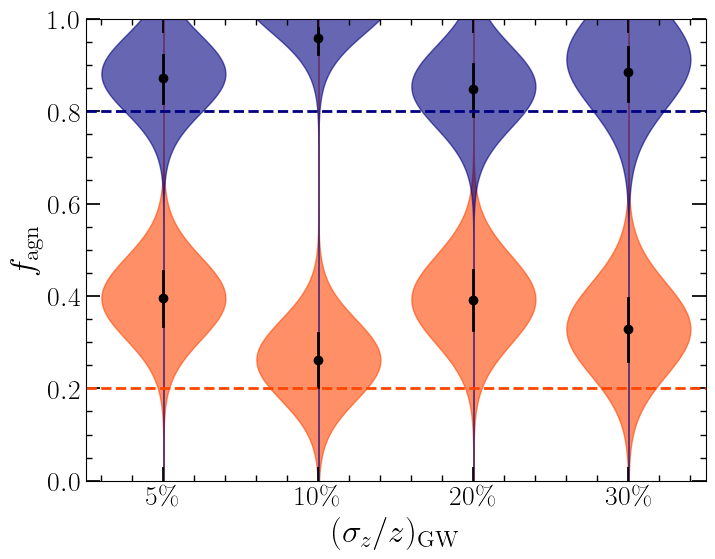

In [140]:
plot_fagn_idx = np.array([4, 16])  # np.array([len(TRUE_FAGNS)//2])

fig, ax = plt.subplots(figsize=(8, 6))

for idx, fagn_idx in enumerate(plot_fagn_idx):
    post_list = []
    cdf_list = []
    for i, posterior in enumerate(posteriors):
        pdfs = get_pdfs(posterior, LOG_LLH_X_AX)
        post_list.append(pdfs[:, fagn_idx])

        cdfs = get_cdfs(posterior)
        cdf_list.append(cdfs[:, fagn_idx])

    for i, pdf in enumerate(post_list, start=1):
        # Normalize the PDF to make the violin shape nice
        pdf = pdf / pdf.max() * 0.4  # scale width

        current_cdf = cdf_list[i-1]
        inverse_cdf = interp1d(current_cdf, LOG_LLH_X_AX, bounds_error=False, fill_value='extrapolate')
        q25 = inverse_cdf(0.25)
        q75 = inverse_cdf(0.75)
        median = inverse_cdf(0.5)

        ax.fill_betweenx(LOG_LLH_X_AX, i - pdf, i + pdf, alpha=0.6, color=COLORS[idx])

        ax.plot([i, i], [q25, q75], color='black', linewidth=2)  # IQR
        ax.plot(i, median, 'o', color='black', markersize=6)      # Median

ax.hlines(TRUE_FAGNS[ plot_fagn_idx ], 0.5, 4.5, colors=COLORS[:len(plot_fagn_idx)+1], linestyle='dashed', linewidth=2)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels([r'$5\%$', r'$10\%$', r'$20\%$', r'$30\%$'])
ax.set_xlim(0.5, 4.5)
ax.set_ylim(0, 1)
ax.set_ylabel(r'$f_{\rm agn}$')
ax.set_xlabel(r'$(\sigma_{z} / z)_{\rm GW}$')
# fig.savefig('violin_agn_zerror_0.2.pdf', bbox_inches='tight')
# fig.savefig('violin_agn_zerror_0.pdf', bbox_inches='tight')
plt.show()


# Testing integration methods

1000it [00:05, 181.56it/s]


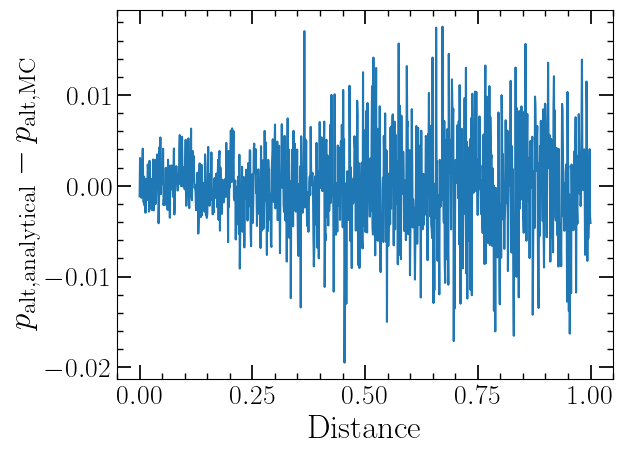

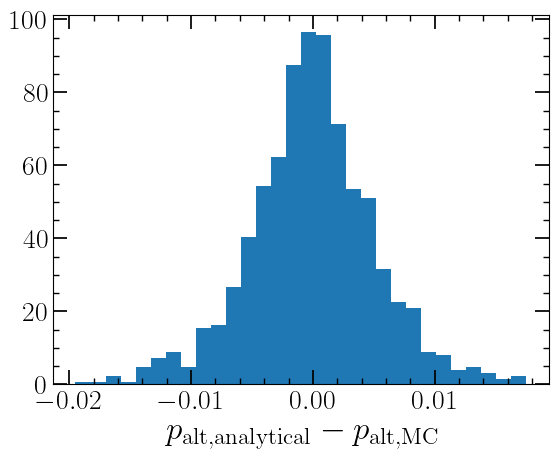

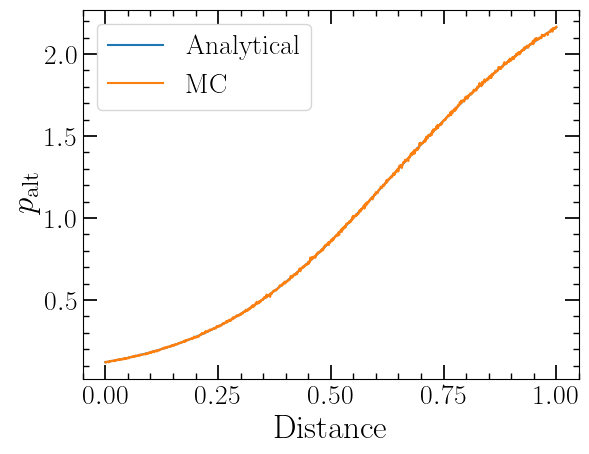

In [13]:
from scipy.integrate import quad
from scipy.stats import truncnorm, norm
from tqdm import tqdm
from scipy.special import erf
from scipy.interpolate import interp1d


def integral_truncnorm_times_prior(mu, sig=0.2, rmin=0, rmax=1):
    '''
    normalization * int_0^rmax x^2 e^(-(x - mu)^2/(2sigma^2)) dx

    x - mu = X
    dx = dX
    x = 0 -> X = -mu
    x = rmax -> X = rmax - mu
    
    normalization * int_{-mu}^{rmax - mu} (X + mu)^2 e^{-X^2 / (2sig^2)} dX
    '''
    # Phi = lambda x: 0.5 * (1 + erf(x / np.sqrt(2)))
    Phi = lambda x: norm.cdf(x, loc=0, scale=1)

    integral = lambda x: np.sqrt(np.pi / 2) * sig * (sig**2 + mu**2) * erf(x / (np.sqrt(2) * sig)) - sig**2 * np.exp(-x**2 / (2 * sig**2)) * (2 * mu + x)
    definite_integral = integral(rmax - mu) - integral(-mu)
    normalization = (3 / rmax**3) * (1 / (sig * (Phi((rmax - mu) / sig) - Phi((rmin - mu) / sig)) )) / np.sqrt(2 * np.pi)
    return normalization * definite_integral


def dVdr_prior(r, rmax=1):
    '''Uniform in volume distribution on radius, normalized between 0 and rmax.'''
    return np.where((r < rmax) & (r > 0), r**2 / rmax**3 * 3, 0)

n_integrals = 1000
abs_dist_err = 0.2
pos = np.linspace(0, 1, n_integrals)
results = np.zeros(n_integrals)
mc_results = np.zeros(n_integrals)
for i, obs_loc in tqdm( enumerate(pos) ):
    func = lambda x: dVdr_prior(x) * truncnorm.pdf(x, a=(0 - obs_loc) / abs_dist_err, b=(1 - obs_loc) / abs_dist_err, loc=obs_loc, scale=abs_dist_err)
    results[i] = quad(func, 0, 1)[0]

    n_mc_samps = int(1e4)
    samps = truncnorm.rvs(a=(0 - obs_loc) / abs_dist_err, b=(1 - obs_loc) / abs_dist_err, loc=obs_loc, scale=abs_dist_err, size=n_mc_samps)
    p_alt = np.sum( dVdr_prior(samps, 1) ) / n_mc_samps

    mc_results[i] = p_alt

diffs = results - mc_results

plt.figure()
plt.plot(pos, diffs)
plt.xlabel('Distance')
plt.ylabel(r'$p_{\rm alt, analytical} - p_{\rm alt, MC}$')
plt.show()

plt.figure()
plt.hist(diffs, density=True, bins=30)
plt.xlabel(r'$p_{\rm alt, analytical} - p_{\rm alt, MC}$')
plt.show()

plt.figure()
plt.plot(pos, results, label='Analytical')
plt.plot(pos, mc_results, label='MC')
plt.legend()
plt.xlabel('Distance')
plt.ylabel(r'$p_{\rm alt}$')
plt.show()


In [ ]:
from utils import fast_z_at_value
from default_arguments import *
import astropy.units as u
from astropy.constants import c

####################################################################
SPEED_OF_LIGHT_KMS = c.to('km/s').value
GW_DIST_ERR = 0.2  # Relative error
COMDIST_MIN = 0
COMDIST_MAX = 5000  # Maximum comoving distance in Mpc
VOLUME = 4 / 3 * np.pi * COMDIST_MAX**3
AGN_NUMDENS = 100 / VOLUME
BATCH = int(100)
N_POST_SAMPS = int(1e4)
N_MC_SAMPS = int(1e3)
N_TRIALS = 1000
MAX_N_FAGNS = 51
CALC_LOGLLH_AT_N_POINTS = 1000

# All subsequent globals are derived from the parameters above.
NAGN = int( np.ceil(AGN_NUMDENS * VOLUME) )

rr = np.linspace(COMDIST_MIN, COMDIST_MAX, 1000)
assert NAGN >= BATCH, 'Every AGN-origin GW must come from a unique AGN. Got {NAGN} AGN and {BATCH} AGN-origin GWs.'
print(f'#AGN is rounded from {AGN_NUMDENS * VOLUME} to {NAGN}, giving a number density of {NAGN / VOLUME:.3e}. Target was {AGN_NUMDENS:.3e}.')
NGW_ALT = BATCH
NGW_AGN = BATCH
N_TRUE_FAGNS = min(BATCH + 1, MAX_N_FAGNS)  # Cannot create more f_agn values than BATCH+1 and don't want to generate more than MAX_N_FAGNS
LOG_LLH_X_AX = np.linspace(0.0001, 0.9999, CALC_LOGLLH_AT_N_POINTS)

COSMO = DEFAULT_COSMOLOGY
ZMIN = 1e-4
ZMAX = fast_z_at_value(COSMO.comoving_distance, COMDIST_MAX * u.Mpc)
LUMDIST_MIN = COSMO.luminosity_distance(ZMIN).value
LUMDIST_MAX = COSMO.luminosity_distance(ZMAX).value

USE_GW_SELECTION_EFFECTS = False
LUMDIST_THRESH_GW = LUMDIST_MAX  # Luminosity distance threshold in Mpc

## These lines are for making the underlying truth equal to the actual realization of that truth - TODO: CURRENTLY BINOMIAL OPTION DOESN'T WORK
USE_N_AGN_EVENTS = np.arange(0, BATCH + 1, int(BATCH / (N_TRUE_FAGNS - 1)), dtype=np.int32)
TRUE_FAGNS = USE_N_AGN_EVENTS / BATCH
REALIZED_FAGNS = USE_N_AGN_EVENTS / BATCH  # Realization of the truth

LUMDIST_AT_MAX_REDSHIFT = COSMO.luminosity_distance(999).value  # For removing errors in generating posteriors later
####################################################################


#AGN is rounded from 100.0 to 100, giving a number density of 1.910e-10. Target was 1.910e-10.


10000it [00:05, 1703.61it/s]


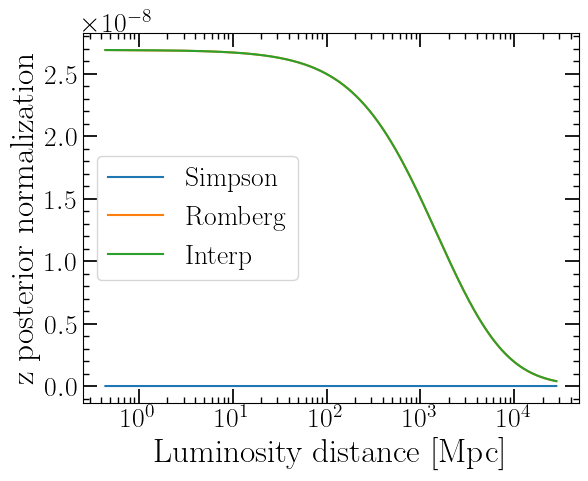

In [70]:
def dVdz_unnorm(z, cosmo):
    '''Assuming flat LCDM'''
    Omega_m = cosmo.Om0
    Omega_Lambda = 1 - Omega_m
    E_of_z = np.sqrt((1 + z)**3 * Omega_m + Omega_Lambda)
    com_vol = ((1 + z) * cosmo.angular_diameter_distance(z).value)**2 / E_of_z
    return com_vol


func = lambda z: dVdz_unnorm(z, COSMO)
# zz = np.linspace(ZMIN, ZMAX, 1000)
# NORM = simpson(y=func(zz), x=zz)
NORM = quad(func, ZMIN, ZMAX)[0]  # NORMALIZE UP TO ZMAX, since p_rate(z > ZMAX) = 0


def dVdz_prior(z, norm=NORM, cosmo=COSMO):
    z = np.atleast_1d(z)
    result = np.zeros_like(z)
    within_limits = (z < ZMAX) & (z > ZMIN)
    result[within_limits] = dVdz_unnorm(z[within_limits], cosmo) / norm
    return result


def generate_posterior(rlum_obs, rlum_relerr=GW_DIST_ERR, n_posterior_samples=N_POST_SAMPS):
    # Importance resampling of distances
    dtrue_postsamps = rlum_obs / (1 + rlum_relerr * np.random.normal(size=4 * n_posterior_samples))
    neg = dtrue_postsamps < LUMDIST_MIN
    if np.sum(neg) != 0:
        print(f'removing {np.sum(neg)} negative lumdist samples')
    dtrue_postsamps = dtrue_postsamps[~neg]  # WARNING: Negative values are very rare, (20% (30%) error, 50k (100k) postsamps, 1 (180) negative samp), so just remove them. But be aware!
    weights = dtrue_postsamps / np.sum(dtrue_postsamps)  # Importance weights proportional to d
    lumdist_samples = np.random.choice(dtrue_postsamps, size=2 * n_posterior_samples, p=weights)
    
    n_samps_above_max_z = np.sum(lumdist_samples > LUMDIST_AT_MAX_REDSHIFT)
    if n_samps_above_max_z != 0:
        lumdist_samples = lumdist_samples[lumdist_samples < LUMDIST_AT_MAX_REDSHIFT]
        print(f'Removing {n_samps_above_max_z} samples at too high luminosity distance ({LUMDIST_AT_MAX_REDSHIFT:.2f}).')
    
    # Redshift reweighting
    z_samples = fast_z_at_value(COSMO.luminosity_distance, lumdist_samples * u.Mpc)
    H_z = COSMO.H(z_samples).value  # H(z) in km/s/Mpc
    chi_z = (1 + z_samples) * lumdist_samples
    dDL_dz = chi_z + (1 + z_samples) * (SPEED_OF_LIGHT_KMS / H_z)
    z_weights = 1 / dDL_dz
    z_weights /= np.sum(z_weights)
    z_samples = np.random.choice(z_samples, n_posterior_samples, p=z_weights)
    return lumdist_samples, z_samples


def unnormed_lumdist_distribution(d, dobs, sigma):
    return np.exp(-(dobs/d - 1)**2 / (2 * sigma**2)) / d


# def lumdist_distribution(d, dobs, sigma):
#     func = lambda x: unnormed_lumdist_distribution(x, dobs=dobs, sigma=sigma)
#     dd = np.geomspace(dobs / 10, dobs * 10, 10000)
#     norm = simpson(y=func(dd), x=dd)
#     return unnormed_lumdist_distribution(d, dobs, sigma) / norm


def unnormed_redshift_distribution(z, dobs, sigma):
    dl = COSMO.luminosity_distance(z).value
    H_z = COSMO.H(z).value  # H(z) in km/s/Mpc
    chi_z = (1 + z) * dl
    dDL_dz = chi_z + (1 + z) * (SPEED_OF_LIGHT_KMS / H_z)
    return unnormed_lumdist_distribution(dl, dobs, sigma) / dDL_dz

from scipy.integrate import simpson, romb
from scipy.interpolate import CubicSpline

n_norms = 10000
redshift_norm_z_axis = np.geomspace(ZMIN / 10, 10 * ZMAX, 10000)
romb_z_axis = np.geomspace(ZMIN / 10, 10 * ZMAX, 513)  #np.linspace(ZMIN, ZMAX, 8193)
# print(np.diff(np.log10(romb_z_axis)))
# sys.exit(1)

znorms = np.zeros(n_norms)
znorms_trapz = np.zeros(n_norms)
znorms_quad = np.zeros(n_norms)
znorms_romb = np.zeros(n_norms)
trial_lumdist = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, n_norms)
for i, dobs in tqdm(enumerate(trial_lumdist)):
    # func = lambda x: unnormed_redshift_distribution(x, dobs, sigma=GW_DIST_ERR)
    # znorms[i] = simpson(y=func(redshift_norm_z_axis), x=redshift_norm_z_axis)

    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma=GW_DIST_ERR) * x * np.log(10)
    znorms_romb[i] = romb(y=func(romb_z_axis), dx=np.diff(np.log10(romb_z_axis))[0])

    # znorms_trapz[i] = np.trapezoid(y=func(redshift_norm_z_axis), x=redshift_norm_z_axis)
    # znorms_quad[i] = quad(func, min(redshift_norm_z_axis), max(redshift_norm_z_axis))[0]
znorms_interp = CubicSpline(trial_lumdist, znorms_romb)
# znorms_interp_quad = interp1d(trial_lumdist, znorms_quad)

lumdist_interp_axis = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, 10 * n_norms)
plt.figure()
plt.plot(trial_lumdist, znorms, label='Simpson')
plt.plot(trial_lumdist, znorms_romb, label='Romberg')
plt.plot(lumdist_interp_axis, znorms_interp(lumdist_interp_axis), label='Interp')
# plt.plot(trial_lumdist, znorms_trapz, label='Trapezoid')
# plt.plot(trial_lumdist, znorms_quad, label='Quad')
plt.semilogx()
plt.legend()
plt.xlabel('Luminosity distance [Mpc]')
plt.ylabel('z posterior normalization')
plt.show()


def redshift_distribution(z, dobs, sigma):
    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma) * x * np.log(10)
    # norm = znorms_interp(dobs)
    norm = romb(y=func(romb_z_axis), dx=np.diff(np.log10(romb_z_axis))[0])
    
    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma)
    return func(z) / norm


def redshift_posterior_times_alt_prior(z, obs_dl, dl_err):
    return redshift_distribution(z, obs_dl, dl_err) * dVdz_prior(z)

# def redshift_distribution_quad(z, dobs, sigma):
#     func = lambda x: unnormed_redshift_distribution(x, dobs, sigma)
#     norm = znorms_interp_quad(dobs)
#     return func(z) / norm

# def redshift_posterior_times_alt_prior_quad(z, obs_dl, dl_err):
#     return redshift_distribution_quad(z, obs_dl, dl_err) * dVdz_prior(z)


1it [00:00,  8.91it/s]

removing 20226 negative lumdist samples


52it [00:03, 19.11it/s]

removing 1 negative lumdist samples


100it [00:04, 21.52it/s]


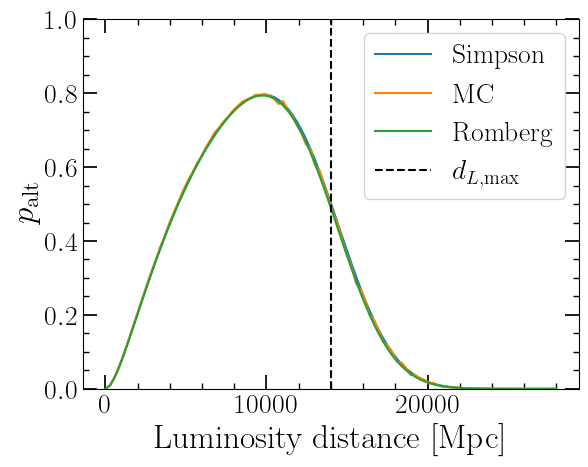

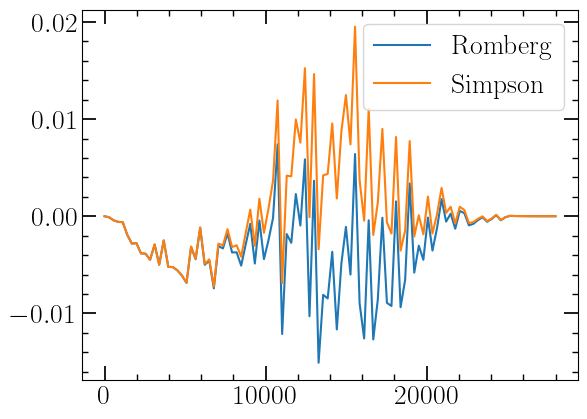

In [86]:
# print(LUMDIST_AT_MAX_REDSHIFT)
# obs_dl = 10000
# dl_err = 0.2
# dl, z = generate_posterior(obs_dl, rlum_relerr=dl_err, n_posterior_samples=int(1e4))
# xx = np.linspace(obs_dl / 10, 3 * obs_dl, 1000)
# zz = fast_z_at_value(COSMO.luminosity_distance, xx * u.Mpc)
# print(zz[0], zz[-1])
# plt.figure()
# # plt.plot(xx, lumdist_distribution(xx, obs_dl, dl_err))
# # plt.hist(dl, density=True, bins=100)

# func = lambda x: unnormed_redshift_distribution(x, obs_dl, dl_err)
# norm = znorms_interp(obs_dl)
# normquad = quad(func, ZMIN, 5 * ZMAX)[0]
# print(norm, normquad)
# plt.plot(zz, unnormed_redshift_distribution(zz, obs_dl, dl_err) / normquad)
# plt.plot(zz, redshift_distribution(zz, obs_dl, dl_err))
# plt.hist(z, density=True, bins=100)
# plt.xlabel('Redshift')
# plt.show()

def p_alt_integral(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err)
    return simpson(y=func(redshift_integral_axis), x=redshift_integral_axis)


def p_alt_romb(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err) * np.log(10) * x
    return romb(y=func(redshift_integral_axis), dx=np.diff(np.log10(redshift_integral_axis))[0])


n_integrals = 100
results = np.zeros(n_integrals)
# quad_results = np.zeros(n_integrals)
mc_results = np.zeros(n_integrals)
romb_results = np.zeros(n_integrals)
trial_lumdist = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, n_integrals)
zz = np.linspace(ZMIN, ZMAX, 1000)
romb_z_ax = np.geomspace(ZMIN, ZMAX, 513)
for i, dl in tqdm( enumerate(trial_lumdist) ):
    # func = lambda x: redshift_posterior_times_alt_prior(x, dl, GW_DIST_ERR)
    # results[i] = quad(func, ZMIN, ZMAX)[0]
    results[i] = p_alt_integral(zz, dl)

    # func_quad = lambda x: redshift_posterior_times_alt_prior_quad(x, dl, GW_DIST_ERR)
    # quad_results[i] = quad(func_quad, ZMIN, ZMAX)[0]

    _, zsamps = generate_posterior(dl, rlum_relerr=GW_DIST_ERR, n_posterior_samples=N_POST_SAMPS)
    mc_samps = np.random.choice(zsamps, size=N_MC_SAMPS * 100)
    mc_samps_below_thresh = mc_samps[mc_samps < ZMAX]
    p_alt = np.sum( dVdz_prior(mc_samps_below_thresh) ) / N_MC_SAMPS / 100

    mc_results[i] = p_alt

    romb_results[i] = p_alt_romb(romb_z_ax, dl)

# p_alt_interp = interp1d(trial_lumdist, results)

plt.figure()
# plt.plot(trial_lumdist, quad_results, label='Quad')
plt.plot(trial_lumdist, results, label='Simpson')
plt.plot(trial_lumdist, mc_results, label='MC')
plt.plot(trial_lumdist, romb_results, label='Romberg')
plt.vlines(LUMDIST_MAX, 0, 1, linestyles='dashed', color='black', label=r'$d_{L, \rm max}$')
plt.legend()
plt.xlabel('Luminosity distance [Mpc]')
plt.ylabel(r'$p_{\rm alt}$')
plt.ylim(0, 1)
# plt.semilogx()
plt.show()

plt.figure()
plt.plot(trial_lumdist, romb_results - mc_results, label='Romberg')
plt.plot(trial_lumdist, results - mc_results, label='Simpson')
plt.legend()
plt.show()

# plt.figure()
# plt.hist(diffs, density=True, bins=30)
# plt.show()

# plt.figure()
# plt.plot(trial_lumdist, diffs / mc_results)
# plt.show()

# plt.figure()
# plt.plot(trial_lumdist, diffs / results)
# plt.show()


In [17]:
print(trial_lumdist[mc_results == 0])

[22901.85651551 23184.59003355 23750.05706962 24315.52410569
 24598.25762373 24880.99114177 25163.7246598  25446.45817784
 25729.19169588 26011.92521391 26294.65873195 26577.39224999
 26860.12576802 27142.85928606 27425.5928041  27708.32632213
 27991.05984017]


In [18]:
def p_alt_integral(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err)
    print(func(redshift_integral_axis).shape)
    return simpson(y=func(redshift_integral_axis), x=redshift_integral_axis, axis=1)

print( p_alt_integral(zz, obs_dl=np.array([10, 100, 1000])[:,np.newaxis]) )

arr1 = np.arange(10)
x = np.linspace(0, 1, 10)

arr2 = np.arange(10)

y = np.array([arr1, arr2])
print(y.shape)

print( simpson(y=y, x=x, axis=1) )

(3, 1000)
[1.68571193e-05 1.28054332e-03 7.59028278e-02]
(2, 10)
[4.5 4.5]
